<a href="https://www.analytiksinc.com">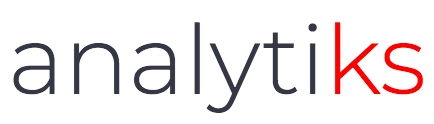</a>
<p style="text-align: right;"> © 2018. Analytiks Inc. </p>

# EXERCISE: Clustering Insurance Leads with Survey Results

Consider that you’re a marketing manager at an insurance firm and that you want to customize your offerings to suit the needs of your customers. You’ve decided to try out customer profiling and segmentation. After much thought, you decide on the two factors that you think the customers would value the most. Those are:
* A savings on premium paid
* The local availability of nearby insurance agents

The importance of these factors will be measured using something called the “likert scale”, wherein a rating of 1 represents not important and a rating of 7 represent very important. 

You conduct the survey with 150 respondents.  The survey results are in a CSV file called “Survey Results.csv”
1.	How many segments would you create?
2.	Describe each segment you create in terms of the input variables
3.	How would you target each customer segment?

## Import the Necessary Libraries

In [20]:
#Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [21]:
#KMeans Clustering
from sklearn.cluster import KMeans

## Load and Explore the Dataset

The file we'll be working with is called "Survey Results.csv"

In [22]:
#Load the Dataset
df = pd.read_csv('Survey Results.csv')

In [23]:
#View the Dataset
df.head()

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


In [24]:
df.columns = ['Premium Savings', 'Agent']
df.head()

,Premium Savings,Agent
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


In [25]:
#Describe the data
df.describe()

,Premium Savings,Agent
count,150.000000,150.000000
mean,4.093333,4.046667
std,1.918986,2.014500
min,1.000000,1.000000
25%,3.000000,2.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,7.000000,7.000000


Text(0.5,0,'Premium Savings / Agent')

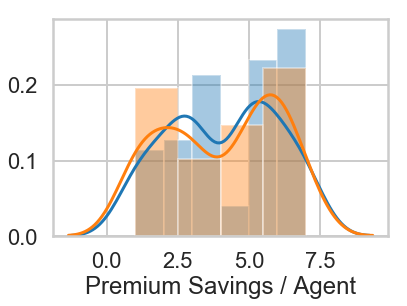

In [30]:
#Visualizing the data - displot
plot_savings = sns.distplot(df["Premium Savings"])
plot_agent = sns.distplot(df["Agent"])
plt.xlabel('Premium Savings / Agent')

## Train a Clustering Model

In [34]:
# Use Elbow Method to Determine Optimal K
# Compute the Within Cluster Sum of Squares (wcss) for k=1 to k=11
wcss = []


for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)

Text(0,0.5,'wcss')

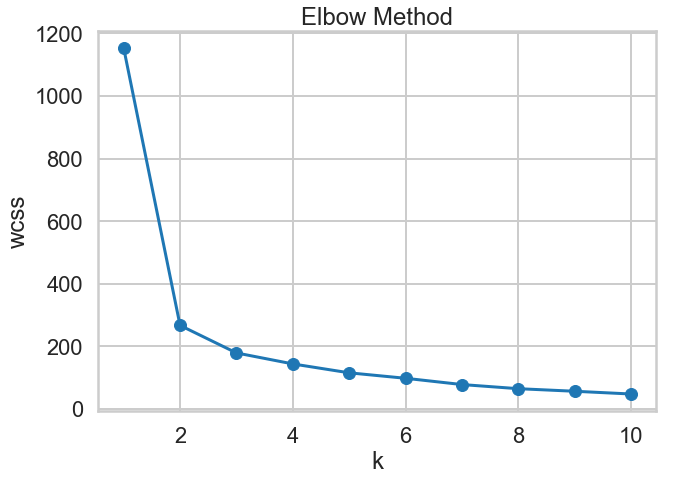

In [35]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("wcss")

In [36]:
##Fitting kmeans to the dataset with k=2
km=KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(df)

In [37]:
## Add the labels to the original dataframe
df_k2 = df.copy()
df_k2['Label'] = y_means

In [38]:
df_k2.head()

,Premium Savings,Agent,Label
0,5,5,1
1,6,7,1
2,6,5,1
3,6,6,1
4,5,6,1


## Visualize the Results

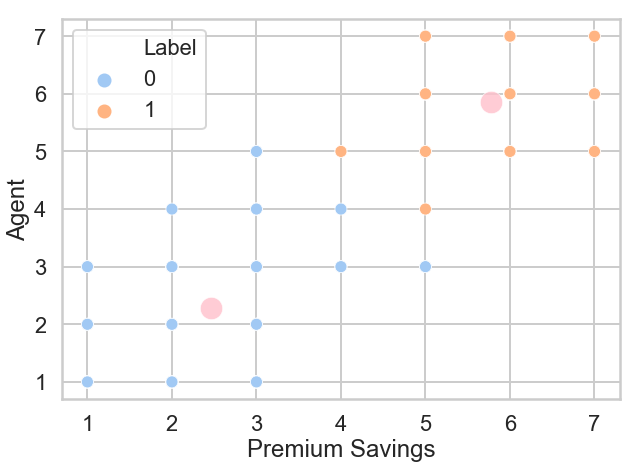

In [39]:
#Visualizing the clusters for k=2

#Set a color palette
pastel_colors = sns.color_palette("pastel", 2)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_k2['Premium Savings'], y=df_k2['Agent'], hue=df_k2.Label, 
                palette=pastel_colors)

#Add on the cluster centers
centers = km.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='pink')

## Analyze the Clusters

In [40]:
#Check the size of each cluster
df_k2.Label.value_counts()

0    76
1    74
Name: Label, dtype: int64

In [41]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k2, index = ['Label'], values = ['Premium Savings','Agent'], 
               aggfunc=[np.mean,np.min, np.max])

mean                  amin                  amax                
          Agent Premium Savings Agent Premium Savings Agent Premium Savings
Label                                                                      
0      2.289474        2.460526     1               1     5               5
1      5.851351        5.770270     4               4     7               7

**Respondents were asked how important the following factors are:**

    1) A savings on premium paid
    2) The local availability of nearby insurance agents
    
**A 7-point importance (Likert) scale was used:**

    1 – Not at all important
    2 – Low importance
    3 – Slightly important
    4 – Neutral
    5 – Moderately important
    6 – Very important
    7 – Extremely important
    
Source:https://www.peru.edu/oira/wp-content/uploads/sites/65/2016/09/Likert-Scale-Examples.pdf

##### CUSTOMER PROFILES
* **CLUSTER 0 *(Blue)*** - Premium savings and availability of agents are least important;
* **CLUSTER 1 *(Orange)*** - Premium savings and availability of agents are very important; These customers prefer both savings on their premium as well as a neighborhood agent.

## List Down Possible Use Cases/Applications for the Results

##### Business Solutions to Customer Profiles:
    
* CLUSTER 0 - Increase visibility of agents in the market (Market Penetration); Come up with products that offer savings on premium rates

* CLUSTER 1 - Offer more sophisticated and easily accessible (higher premiums) insurance products; and readily available and easy to understand packages, no need to seek assistance from agents